In [1]:
import MySQLdb
conn = MySQLdb.connect(host='127.0.0.1', port=3306, user='root', passwd='123', db='edm', charset='utf8')
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import pandas.io.sql as sql
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D

In [2]:
data = pd.DataFrame()
for i in range(14):
    data_t = pd.read_csv('C:\\Users\\X1\\Desktop\\indicator\\'+(str)(i)+'_indicator.csv')
    data = pd.concat([data, data_t])

In [3]:
data.head()

,stage_index,study_effect,study_active,resource_userate,resource_transrate,question_correctrate,course_frequency,course_time,assign_frequency,assign_time,pause_frequency,drag_frequency
0,0,5.631104,6.006511,12.013022,0.125,0.93750,4,1.511389,3,0.5,61,0
1,0,0.000000,0.000000,0.000000,1.000,0.93750,0,0.000000,0,0.0,0,0
2,0,0.000000,0.000000,0.000000,1.000,0.96875,0,0.000000,0,0.0,0,0
3,0,0.000000,0.000000,0.000000,1.000,0.93750,0,0.000000,0,0.0,0,0
4,0,0.000000,0.000000,0.000000,1.000,0.93750,0,0.000000,0,0.0,0,0


In [4]:
data.index = np.arange(data.shape[0])

将course_time=0（没有看课件）直接归为label=4

In [5]:
data['label'] = np.nan
data.head()

,stage_index,study_effect,study_active,resource_userate,resource_transrate,question_correctrate,course_frequency,course_time,assign_frequency,assign_time,pause_frequency,drag_frequency,label
0,0,5.631104,6.006511,12.013022,0.125,0.93750,4,1.511389,3,0.5,61,0,NaN
1,0,0.000000,0.000000,0.000000,1.000,0.93750,0,0.000000,0,0.0,0,0,NaN
2,0,0.000000,0.000000,0.000000,1.000,0.96875,0,0.000000,0,0.0,0,0,NaN
3,0,0.000000,0.000000,0.000000,1.000,0.93750,0,0.000000,0,0.0,0,0,NaN
4,0,0.000000,0.000000,0.000000,1.000,0.93750,0,0.000000,0,0.0,0,0,NaN


In [6]:
for t in data.index:
    if(data.loc[t, 'course_time']==0):
        data.loc[t, 'label']=4

In [7]:
data1 = data.loc[:, ['stage_index', 'resource_transrate', 'question_correctrate', 'course_frequency', 'course_time', 'assign_frequency','assign_time', 'pause_frequency','drag_frequency','label']]
data1['label'].value_counts()

4.0    608
Name: label, dtype: int64

In [8]:
data2 = data1[data1['label']!=4.0]
data2.head()

,stage_index,resource_transrate,question_correctrate,course_frequency,course_time,assign_frequency,assign_time,pause_frequency,drag_frequency,label
0,0,0.125000,0.937500,4,1.511389,3,0.50,61,0,NaN
6,1,0.250000,0.857143,2,0.252778,1,0.20,7,0,NaN
11,2,0.166667,0.500000,3,0.048889,2,0.45,12,0,NaN
13,3,0.200000,0.100000,2,0.557500,2,0.80,5,0,NaN
15,4,0.142857,0.750000,4,0.711667,2,0.70,4,0,NaN


In [9]:
data2.shape

(665, 10)

阶段50-70左右的数据缺失

Text(0,0.5,'number of records')

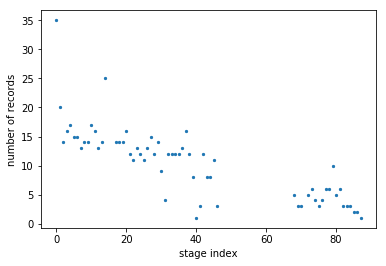

In [10]:
t = data2['stage_index'].value_counts()
plt.scatter(t.index, t, s=5)
plt.xlabel('stage index')
plt.ylabel('number of records')

## 开始聚类啦

In [11]:
data4 = data2.iloc[:, 1:-1]
data4.head()

,resource_transrate,question_correctrate,course_frequency,course_time,assign_frequency,assign_time,pause_frequency,drag_frequency
0,0.125000,0.937500,4,1.511389,3,0.50,61,0
6,0.250000,0.857143,2,0.252778,1,0.20,7,0
11,0.166667,0.500000,3,0.048889,2,0.45,12,0
13,0.200000,0.100000,2,0.557500,2,0.80,5,0
15,0.142857,0.750000,4,0.711667,2,0.70,4,0


Text(0,0.5,'Distortion')

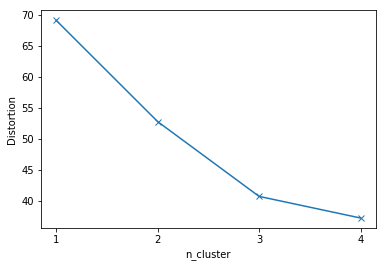

In [12]:
from scipy.spatial.distance import cdist
K=range(1,5)
meandistortions=[]
for k in K:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(data4)
    meandistortions.append(sum(np.min(cdist(data4,kmeans.cluster_centers_, 'euclidean'),axis=1))/data4.shape[0])
plt.plot(K,meandistortions,'x-')
plt.xlabel('n_cluster')
plt.xticks(np.arange(1,5,1))
plt.ylabel('Distortion')

看起来聚3类也很合适！

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

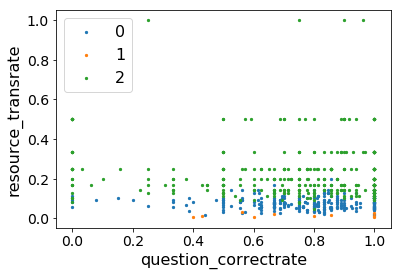

In [13]:
myModel = KMeans(n_clusters=3)
data_to_cluster=preprocessing.scale(data4)
myModel.fit(data_to_cluster)
label_pred = myModel.labels_
centroids = myModel.cluster_centers_

data4['label'] = label_pred#

data4_1 = data4[data4['label']==1]
data4_2 = data4[data4['label']==2]
data4_0 = data4[data4['label']==0]
#data4_3 = data4[data4['label']==3]

list4 = [data4_0,data4_1, data4_2]




for result in list4:
    plt.scatter(result['question_correctrate'], result['resource_transrate'],s=5)
legend_list=['0','1', '2']
plt.legend(legend_list, fontsize=16)
plt.xlabel('question_correctrate',fontsize=16 )
plt.ylabel('resource_transrate',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [14]:
a = []
for result in list4:
    #print(result.mean(),'\n\n\n')
    a.append(result.mean())
data5 = pd.DataFrame(a)
data5

,resource_transrate,question_correctrate,course_frequency,course_time,assign_frequency,assign_time,pause_frequency,drag_frequency,label
0,0.077194,0.768321,11.171533,5.470756,3.164234,12.832117,83.332117,33.806569,0.0
1,0.014524,0.731488,94.200000,38.426472,8.500000,22.675000,714.400000,469.000000,1.0
2,0.229197,0.743534,3.433071,1.747297,1.002625,1.879134,23.614173,7.401575,2.0


In [116]:
data5.to_csv(r'C:\Users\X1\Desktop\青鸟分析temp\data5.csv')

去掉资源转换率再做一次聚类,效果没有那么好，放弃

In [15]:
data4['label'].value_counts()

2    381
0    274
1     10
Name: label, dtype: int64

把data4的标签移到data2（全部都是nan）和data（只有nan和4）上

In [111]:
for ei in data4.index:
    data2.loc[ei,'label'] = data4.loc[ei, 'label']

c:\users\x1\appdata\local\programs\python\python35\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [112]:
data2['label'].value_counts()

2.0    368
1.0    287
0.0     10
Name: label, dtype: int64

In [113]:
for ei in data4.index:
    data.loc[ei, 'label'] = data4.loc[ei, 'label']

In [114]:
data['label'].value_counts()

4.0    608
2.0    368
1.0    287
0.0     10
Name: label, dtype: int64

In [115]:
data.head()

,stage_index,study_effect,study_active,resource_userate,resource_transrate,question_correctrate,course_frequency,course_time,assign_frequency,assign_time,pause_frequency,drag_frequency,label
0,0,5.631104,6.006511,12.013022,0.125,0.93750,4,1.511389,3,0.5,61,0,1.0
1,0,0.000000,0.000000,0.000000,1.000,0.93750,0,0.000000,0,0.0,0,0,4.0
2,0,0.000000,0.000000,0.000000,1.000,0.96875,0,0.000000,0,0.0,0,0,4.0
3,0,0.000000,0.000000,0.000000,1.000,0.93750,0,0.000000,0,0.0,0,0,4.0
4,0,0.000000,0.000000,0.000000,1.000,0.93750,0,0.000000,0,0.0,0,0,4.0


把label=4改成3

In [119]:
for ei in data.index:
    if data.loc[ei, 'label']==4:
        data.loc[ei, 'label']=3
data8 = data['label'].value_counts()

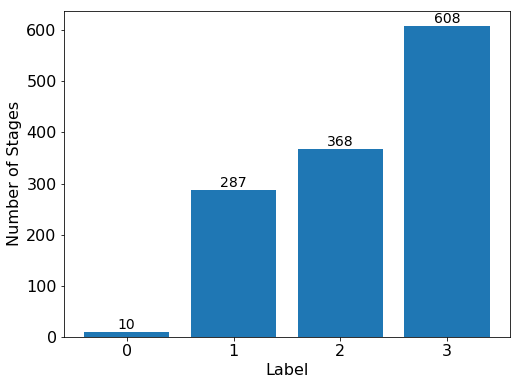

In [124]:
plt.figure(figsize=(8,6))
plt.bar(data8.index, data8)
plt.xlabel('Label', fontsize=16)
plt.ylabel('Number of Stages', fontsize=16)
plt.xticks(np.arange(0,4,1), fontsize=16)
plt.yticks(fontsize=16)
for a,b in zip(data8.index,data8):
    plt.text(a, b, '%.0f' % b, ha='center', va='bottom',fontsize=14)

In [138]:
#注：没有看到0是因为积极型的本来就很少
data9 = data.groupby(['stage_index', 'label'])['label'].count()
data10 = data9.unstack()
data10.head()

label,0.0,1.0,2.0,3.0
stage_index,,,,
0,NaN,4.0,31.0,98.0
1,NaN,1.0,19.0,40.0
2,NaN,2.0,12.0,12.0
3,NaN,4.0,12.0,37.0
4,NaN,7.0,10.0,16.0


In [171]:
for ei in data10.index:
    if np.isnan(data10.loc[ei, 0]):
        data10.loc[ei, 0]=0

TypeError: cannot do label indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [0] of <class 'int'>

In [163]:
data10.head()

label,0.0,1.0,2.0,3.0
stage_index,,,,
0,0.0,4.0,31.0,98.0
1,0.0,1.0,19.0,40.0
2,0.0,2.0,12.0,12.0
3,0.0,4.0,12.0,37.0
4,0.0,7.0,10.0,16.0


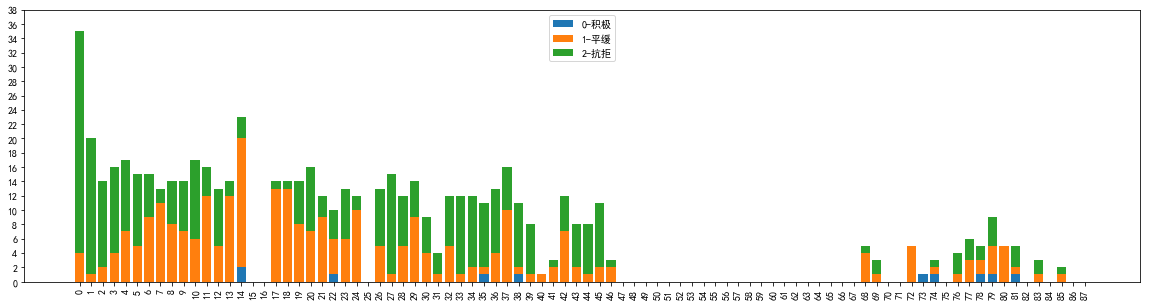

In [160]:

x = data10.index
a = data10.iloc[:,0]
b = data10.iloc[:,1]
c = data10.iloc[:,2]
#d = data10.iloc[:,3]
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.figure(figsize=(20,5))
plt.bar(x, a, label='0-积极')
plt.bar(x, b, bottom=a, label='1-平缓')
plt.bar(x, c, bottom=b, label='2-抗拒')
#plt.bar(x, d, bottom=c, label='d')
plt.xticks(np.arange(0, 88, 1),rotation=90)
plt.yticks(np.arange(0,40,2))
plt.legend()
plt.show()

In [162]:
data.to_csv(r'C:\Users\X1\Desktop\青鸟分析temp\data_w_label.csv')

## 状态转换率

In [176]:
data10 = data10.iloc[:, :-2]
data10.head()

,L0,L1,L2,L3,stage_transrate
stage_index,,,,,
0,0.0,4.0,31.0,98.0,0
1,0.0,1.0,19.0,40.0,0
2,0.0,2.0,12.0,12.0,0
3,0.0,4.0,12.0,37.0,0
4,0.0,7.0,10.0,16.0,0


In [179]:
for ei in data10.index:
    if np.isnan(data10.loc[ei, 'L3']):
        data10.loc[ei, 'L3']=0
    if np.isnan(data10.loc[ei, 'L1']):
        data10.loc[ei, 'L1']=0
    if np.isnan(data10.loc[ei, 'L2']):
        data10.loc[ei, 'L2']=0

In [177]:
data10['stage_transrate']=0
data10.head()

,L0,L1,L2,L3,stage_transrate
stage_index,,,,,
0,0.0,4.0,31.0,98.0,0
1,0.0,1.0,19.0,40.0,0
2,0.0,2.0,12.0,12.0,0
3,0.0,4.0,12.0,37.0,0
4,0.0,7.0,10.0,16.0,0


In [167]:
data10.columns=['L0','L1','L2','L3','stage_transrate']
data10.head()

,L0,L1,L2,L3,stage_transrate
stage_index,,,,,
0,0.0,4.0,31.0,98.0,0
1,0.0,1.0,19.0,40.0,0
2,0.0,2.0,12.0,12.0,0
3,0.0,4.0,12.0,37.0,0
4,0.0,7.0,10.0,16.0,0


In [180]:
data10['stage_transrate'] = (data10['L0']+data10['L1'])/data10['L2']
data10

,L0,L1,L2,L3,stage_transrate
stage_index,,,,,
0,0.0,4.0,31.0,98.0,0.129032
1,0.0,1.0,19.0,40.0,0.052632
2,0.0,2.0,12.0,12.0,0.166667
3,0.0,4.0,12.0,37.0,0.333333
4,0.0,7.0,10.0,16.0,0.700000
5,0.0,5.0,10.0,19.0,0.500000
6,0.0,9.0,6.0,5.0,1.500000
7,0.0,11.0,2.0,9.0,5.500000
8,0.0,8.0,6.0,4.0,1.333333


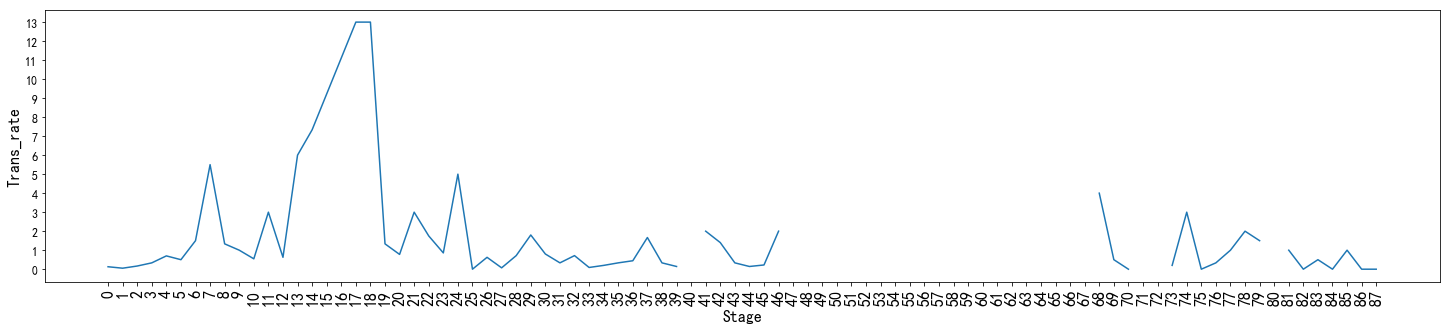

In [188]:
plt.figure(figsize=(25,5))
plt.plot(data10.index, data10['stage_transrate'])
plt.ylabel('Trans_rate', fontsize=16)
plt.xlabel('Stage', fontsize=16)
plt.xticks(np.arange(0,88,1), rotation=90, fontsize=16)
plt.yticks(np.arange(0, 14,1), fontsize=12)
plt.show()

In [190]:
data10.to_csv(r'C:\Users\X1\Desktop\青鸟分析temp\stage_label_trans.csv')

In [191]:
data10.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 17, 18,
            19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
            36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 64, 68, 69, 70, 72, 73,
            74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87],
           dtype='int64', name='stage_index')

In [193]:
data10.loc[85, 'stage_transrate']

1.0

In [194]:
for i in range(14):
    data_t = pd.read_csv('C:\\Users\\X1\\Desktop\\indicator\\'+(str)(i)+'_indicator.csv')
    data_t['stage_transrate'] = 0
    for row in data_t.index:
        stage = data_t.loc[row,'stage_index' ]
        data_t.loc[row, 'stage_transrate'] = data10.loc[stage, 'stage_transrate']
    data_t.to_csv('C:\\Users\\X1\\Desktop\\'+(str)(i)+'_indicator_transrate.csv')